In [11]:
import pandas as pd # Для выгрузки этого
import numpy as np # для рассчетов
import matplotlib.pyplot as plt # графика 
import seaborn as sns # тоже графика 
from collections.abc import Iterable

arr = pd.read_csv('New_rockyou.txt', encoding='UTF-8', sep='\t')
print(arr)

               Password
0                123456
1                 12345
2             123456789
3              password
4              iloveyou
...                 ...
14344241       xCvBnM,
14344242        ie168
14344243    abygurl69
14344244       a6_123
14344245  *7Â¡Vamos!

[14344246 rows x 1 columns]


In [2]:
arr.count()

Password    14344243
dtype: int64

In [4]:
arr.columns

Index(['Password'], dtype='object')

In [5]:
arr.isnull()

,Password
0,False
1,False
2,False
3,False
4,False
...,...
14344241,False
14344242,False
14344243,False
14344244,False


In [6]:
arr.isna().sum()# Сумма по столбца нулевых значений 

Password    3
dtype: int64

In [12]:
t=0
delpos=[]
for k in arr.Password:
    if isinstance(k, str):
        if "http://" in k or "://" in k or "<div>" in k or "<!DOCTYPE" in k or "src=" in k:#Удаление странных ссылок и подобного мусора
            delpos.append(t)
    t+=1
arr=arr.drop(delpos)

In [ ]:
t=0
for k in arr.Password:
    if isinstance(k, Iterable):# для выведения ОЧЕНЬ длинных паролей и проверка на мусор 
        if len(k)>50:
            print(t, k)
    t+=1

In [16]:
ArrForCheck = arr.values[:]

In [20]:
SignsVal = []
SignsName = []

for k in ArrForCheck:
    for i in k:
        if isinstance(i, Iterable):  
            for j in i:
                if isinstance(j, str) and not j.isdigit():
                    if j in SignsName:
                        SignsVal[SignsName.index(j)] += 1
                    else:
                        SignsName.append(j)
                        SignsVal.append(0)
                        SignsVal[SignsName.index(j)] += 1
print(SignsName, SignsVal)


['p', 'a', 's', 'w', 'o', 'r', 'd', 'i', 'l', 'v', 'e', 'y', 'u', 'n', 'c', 'k', 'b', 'g', 'm', 'j', 'h', 'q', 't', 'f', 'z', 'x', 'P', 'A', 'S', 'W', 'O', 'R', 'D', '!', 'I', 'L', 'V', 'E', 'Y', 'U', 'N', 'C', ' ', ';', 'B', 'K', '-', 'G', 'J', 'H', 'T', 'M', '*', '.', '?', ',', '/', 'Ã', '±', 'Q', '#', 'F', 'X', '@', '$', '%', '^', 'Z', '&', '+', "'", '[', ']', '<', '_', '\\', '"', 'Â', '£', ':', '(', ')', '=', 'à', '\x85', 'ž', '\xa0', '\x96', '§', '`', '\x91', '~', '¶', '\x84', '\x95', 'â', '\x97', '\x8f', '>', '©', 'ª', '\x99', '\xad', 'µ', '¢', '\x9f', '«', '\x9e', '\x81', 'Œ', '\x88', '{', '}', 'Å', 'Ä', '|', '°', '\x89', '·', '\x94', '¡', '\x80', '\x87', 'Ž', 'ñ', '\x9c', '\x9b', '\x83', '\x9d', '×', '€', '¥', 'ï', 'Ÿ', '\x93', '\x90', 'œ', 'º', 'å', 'æ', 'ø', '\x86', '\x8a', '\x8c', '\x8d', '\x98', '\x92', 'Ù', 'Ø', '\x82', 'Î', '»', '¿', 'Ï', '¬', 'Š', 'š', 'é', 'Ð', 'Û', 'Æ', '\n', '¯', '®', 'ú', 'ó', '\x8b', '\x8e', 'í', 'ì', 'è', 'ä', 'ç', '\x9a', 'ã', 'Ñ', 'á', '÷', 'ð', 

In [18]:
NameColWord = [] #количество символов в пароли
NumColWord = [] #количество количество символов в пароли в массиве

for k in ArrForCheck:
    for i in k:
        if isinstance(i, Iterable):  
            if len(i) in NameColWord:
                NumColWord[NameColWord.index(len(i))] += 1
            else:
                NameColWord.append(len(i))
                NumColWord.append(0)
                NumColWord[NameColWord.index(len(i))] += 1

print(NameColWord, NumColWord)

[6, 5, 9, 8, 7, 10, 11, 4, 13, 12, 16, 17, 15, 3, 14, 2, 18, 39, 26, 20, 1, 22, 19, 21, 23, 24, 38, 28, 30, 40, 27, 35, 34, 32, 42, 43, 37, 49, 33, 25, 44, 36, 29, 41, 31, 53, 48, 77, 47, 45, 165, 50, 150, 149, 137, 71, 61, 59, 58, 57, 52, 63, 95, 67, 51, 64, 60, 55, 85, 78, 66, 54, 84, 80, 70, 73, 109, 81, 69, 56, 72, 65, 46, 68, 75, 88, 62, 79, 74, 123, 252, 87, 93, 89, 118, 195, 97, 92, 104, 98, 188, 255, 142, 208, 230, 228, 90, 82, 103, 189, 171, 126, 125, 218, 76, 111, 101, 200, 192, 243, 124, 148, 117, 151, 249, 239, 86, 170, 105, 154, 129, 145, 106, 141, 108, 146, 131, 113, 232, 83, 133, 198, 94, 91, 185] [1947862, 259252, 2190979, 2965989, 2506254, 2013588, 865983, 17933, 364148, 555316, 118368, 36893, 161184, 2464, 248522, 335, 23776, 113, 2243, 13073, 45, 6159, 15572, 7848, 4848, 4234, 64, 1192, 980, 53, 1809, 127, 183, 398, 67, 40, 78, 17, 296, 2939, 30, 186, 777, 43, 465, 11, 39, 3, 22, 51, 2, 22, 2, 1, 1, 7, 20, 7, 15, 16, 14, 14, 2, 11, 21, 17, 19, 22, 3, 5, 10, 25, 6, 4,

In [25]:
ValSigns = []
NameSigns = []

for k in ArrForCheck:
    for i in k:
        if isinstance(i, Iterable):  
            for j in i:
                if isinstance(j, str) and not j.isdigit() and not j.isalpha():
                    if j in NameSigns:
                        ValSigns[NameSigns.index(j)] += 1
                    else:
                        NameSigns.append(j)
                        ValSigns.append(0)
                        ValSigns[NameSigns.index(j)] += 1
print(NameSigns, ValSigns)


['!', ' ', ';', '-', '*', '.', '?', ',', '/', '±', '#', '@', '$', '%', '^', '&', '+', "'", '[', ']', '<', '_', '\\', '"', '£', ':', '(', ')', '=', '\x85', '\xa0', '\x96', '§', '`', '\x91', '~', '¶', '\x84', '\x95', '\x97', '\x8f', '>', '©', '\x99', '\xad', '¢', '\x9f', '«', '\x9e', '\x81', '\x88', '{', '}', '|', '°', '\x89', '·', '\x94', '¡', '\x80', '\x87', '\x9c', '\x9b', '\x83', '\x9d', '×', '€', '¥', '\x93', '\x90', '\x86', '\x8a', '\x8c', '\x8d', '\x98', '\x92', '\x82', '»', '¿', '¬', '\n', '¯', '®', '\x8b', '\x8e', '\x9a', '÷', '\x7f', '\x08', '\x1a', '\x04', '\x03'] [143161, 95341, 12607, 133268, 123972, 249926, 18407, 30141, 48266, 4350, 49201, 108302, 36167, 10265, 6402, 26562, 27504, 15506, 7748, 10824, 9573, 193590, 28425, 1931, 2027, 6792, 17068, 18992, 18512, 2078, 1712, 1388, 1198, 5679, 527, 8371, 1575, 1868, 1301, 1264, 137, 2482, 726, 2534, 603, 871, 2609, 766, 862, 1358, 2836, 1052, 966, 714, 1442, 747, 1658, 363, 625, 811, 309, 263, 161, 192, 39, 450, 425, 513, 117, 

In [21]:
AlfName = []
AlfVal = []

for k in ArrForCheck:
    for i in k:
        if isinstance(i, Iterable):  
            for j in i:
                if isinstance(j, str) and j.isalpha():
                    if j in AlfName:
                        AlfVal[AlfName.index(j)] += 1
                    else:
                        AlfName.append(j)
                        AlfVal.append(0)
                        AlfVal[AlfName.index(j)] += 1
print(AlfName, AlfVal)

['p', 'a', 's', 'w', 'o', 'r', 'd', 'i', 'l', 'v', 'e', 'y', 'u', 'n', 'c', 'k', 'b', 'g', 'm', 'j', 'h', 'q', 't', 'f', 'z', 'x', 'P', 'A', 'S', 'W', 'O', 'R', 'D', 'I', 'L', 'V', 'E', 'Y', 'U', 'N', 'C', 'B', 'K', 'G', 'J', 'H', 'T', 'M', 'Ã', 'Q', 'F', 'X', 'Z', 'Â', 'à', 'ž', 'â', 'ª', 'µ', 'Œ', 'Å', 'Ä', 'Ž', 'ñ', 'ï', 'Ÿ', 'œ', 'º', 'å', 'æ', 'ø', 'Ù', 'Ø', 'Î', 'Ï', 'Š', 'š', 'é', 'Ð', 'Û', 'Æ', 'ú', 'ó', 'í', 'ì', 'è', 'ä', 'ç', 'ã', 'Ñ', 'á', 'ð', 'ù', 'î', 'Õ', 'Ë', 'Í', 'É', 'Ò', 'Ó', 'È', 'Ì', 'À', 'Ö', 'ü', 'ß', 'ö', 'ý', 'ê', 'Ý'] [1620586, 8832757, 4156268, 800059, 5176728, 4578789, 2485532, 5555134, 4462592, 1051271, 7206510, 2374327, 2308268, 4829916, 2609686, 2012839, 2111759, 1718090, 3206742, 1238040, 2336557, 178661, 3426864, 982177, 763884, 479942, 131645, 604635, 315368, 59728, 330430, 320128, 199376, 356871, 331835, 76283, 459918, 161083, 137343, 316801, 209360, 188204, 144121, 130208, 122449, 163069, 249515, 260211, 7554, 17936, 81115, 36054, 53578, 1723, 34731

In [36]:
VowelsVal = 0
ConsonantsVal = 0

for i in AlfName:
    if len(ascii(i))==3 and i.lower() in "aioeu":
        VowelsVal += AlfVal[AlfName.index(i)]
    elif len(ascii(i))==3 and not i.lower() in "aioeu":
        ConsonantsVal+=AlfVal[AlfName.index(i)]
print(VowelsVal,ConsonantsVal)

30968594 50992648


In [47]:
t=0
delpos=[]
for k in arr.Password:
    if isinstance(k, str):
        if "" in k.lower():
            t+=1
print(t)

55529


<BarContainer object of 13 artists>

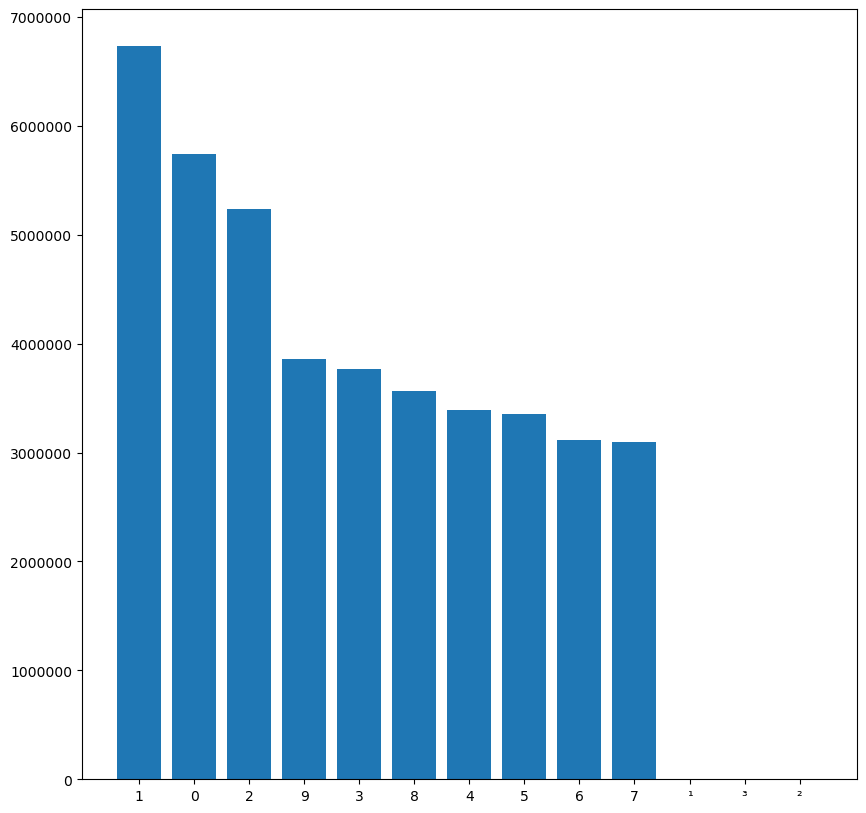

In [49]:
NumBar = pd.DataFrame({'Num':NumName, 'Col':NumVal})
plt.figure(figsize=(10, 10))
plt.ticklabel_format(style='plain')
NumBar = NumBar.sort_values('Col', ascending=False)

plt.bar(NumBar.Num,NumBar.Col)

/tmp/ipykernel_4611/1787457617.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  BarPasCol = Big.append(pd.Series(LitSum, index=["Col"], name="24"))


<Axes: xlabel='Name'>

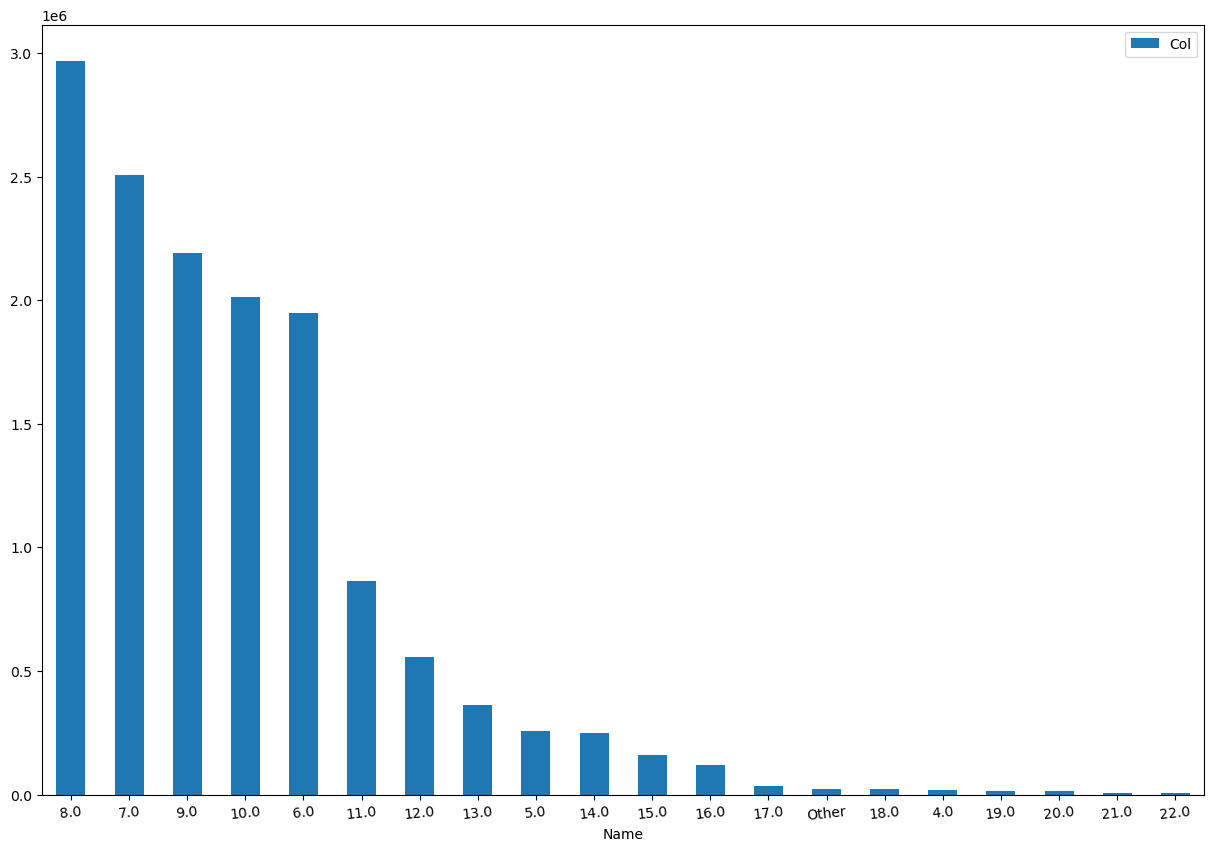

In [48]:
Colichestvo = pd.DataFrame({'Name':NameColWord, 'Col':NumColWord})

Colichestvo['Col']=pd.to_numeric(Colichestvo['Col'], errors='coerce')

Little = Colichestvo[Colichestvo.Col<5000]
Big = Colichestvo[Colichestvo.Col>=5000]

LitSum = Little.Col.sum()
Little=pd.Series(LitSum, index=["Col"])

BarPasCol = Big.append(pd.Series(LitSum, index=["Col"], name="24"))
BarPasCol.Name = BarPasCol.Name.fillna('Other')
BarPasCol = BarPasCol.sort_values('Col', ascending=False)

BarPasCol.plot(kind="bar", y="Col", x="Name", rot=6, fontsize=10, figsize=(15,10))

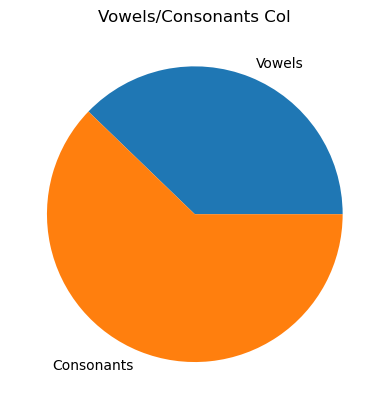

In [39]:
Name = ["Vowels","Consonants"]
Val = [VowelsVal,ConsonantsVal]
plt.title("Vowels/Consonants Col") 
plt.pie(Val,labels=Name)# диаграмма пирог через matplotlib также рандомная
plt.show()

/tmp/ipykernel_4611/1845522652.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  BarAlf = MainAlf.append(pd.Series(OtherAlfSum, index=["Col"], name="24"))


<Axes: xlabel='Name'>

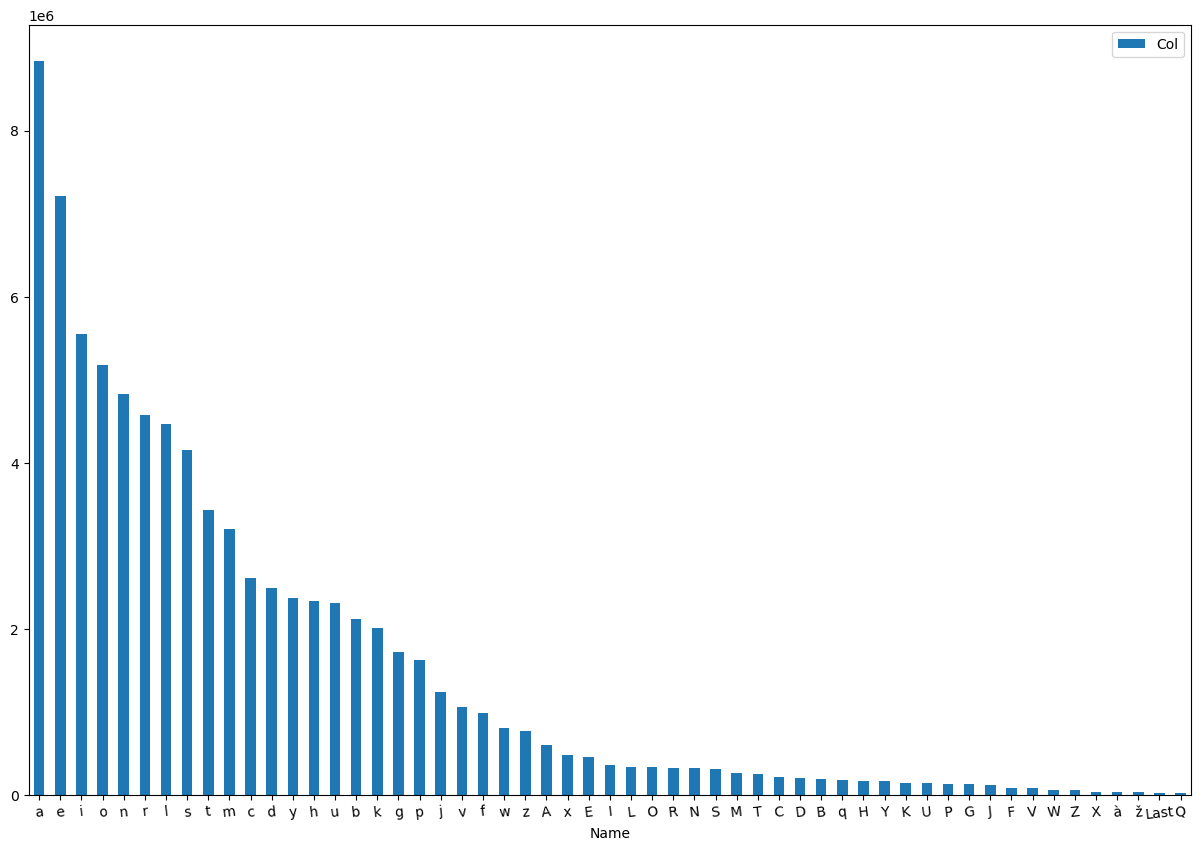

In [47]:
ColAlf = pd.DataFrame({'Name':AlfName, 'Col':AlfVal})

ColAlf['Col']=pd.to_numeric(ColAlf['Col'], errors='coerce')

OtherAlf = ColAlf[ColAlf.Col<10000]
MainAlf = ColAlf[ColAlf.Col>=10000]

OtherAlfSum = OtherAlf.Col.sum()
OtherAlf=pd.Series(OtherAlfSum, index=["Col"])

BarAlf = MainAlf.append(pd.Series(OtherAlfSum, index=["Col"], name="24"))
BarAlf.Name = BarAlf.Name.fillna('Last')
BarAlf = BarAlf.sort_values('Col', ascending=False)

BarAlf.plot(kind="bar", y="Col", x="Name", rot=6, fontsize=10, figsize=(15,10))